In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_v1.csv')

In [ ]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,Super Built up area 780(72.46 sq.m.),2,2,2,not available,1.0,Na,5 to 10 Year Old,"['HUDA Sector 23 Market', 'Palam triangle', 'Palam Vihar Vyapar kendra', 'Ram Mandir', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Metro Hospital and Heart Institute Gurgaon', 'Kalyan Hospital Gurgaon', 'HUDA sector 23 parking', 'Ansals Plaza above ground car parking', 'Ansals plaza underground car parking', 'Punjab national bank', 'Axis bank', 'Oriental bank of commerce', 'Big Cinemas', 'Om Sweets', 'Pind Baluchi', 'Moti Mahal', ""Domino's Pizza"", 'Pizza Hut', 'Cafe Coffee Day', ""McDonald's"", 'THE NORTHCAP UNIVERSITY', 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'Chiranjiv Bharati School', 'Palam vihar railway station']",[],NaN
1,house,independent,sector 39,1.80,21875.0,823.0,Plot area 900(83.61 sq.m.)Built Up area: 800 sq.ft. (74.32 sq.m.)Carpet area: 720 sq.ft. (66.89 sq.m.),1,1,2,not available,3.0,North-East,1 to 5 Year Old,"['Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Dispencery', 'Sukhmani Hospital Pvt. Ltd', 'Shivam Hospital Gurgaon', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Bansal Medicare and Maternity Centre', 'Ahmed Hospital Multi Speciality', 'Dayal Eye & Maternity Centre', 'Pushpanjali Hospital Gurgaon', 'Samvit Health Care', 'Pushpanjali Hospital', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'City Medical', 'Gardian Pharmacy', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Om Sweets', 'Fast food', 'Fast Food', 'Bar and restaurant', 'KFC', 'Darbar', 'Cafe Coffee Day', '32nd Milestone', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Jr', 'St. Angels Sr', 'Amity Global School', 'School of Inspired Leadership SOIL', 'Delhi Public School Primary Section', 'Salvan Public School', 'Manav Rachna Swimming Pool']",Na,NaN


In [ ]:
df['area'].value_counts()

1650.0      55
1350.0      51
1800.0      48
1950.0      44
3240.0      43
2700.0      39
900.0       39
2000.0      35
2400.0      25
2250.0      25
1300.0      22
2150.0      22
1900.0      21
1550.0      20
1400.0      20
1450.0      20
4500.0      20
1578.0      19
1000.0      19
600.0       19
3150.0      18
1200.0      18
450.0       18
1500.0      17
2200.0      17
1150.0      17
2430.0      17
1935.0      16
4518.0      16
1600.0      15
1760.0      15
1930.0      15
1250.0      14
1640.0      14
700.0       14
1620.0      14
1850.0      14
1100.0      14
2160.0      14
2350.0      14
750.0       14
2191.0      13
2010.0      13
1423.0      13
1975.0      13
2408.0      12
500.0       12
2100.0      12
3000.0      12
1750.0      12
1103.0      12
950.0       12
2300.0      12
2812.0      12
650.0       12
1366.0      11
915.0       11
1557.0      11
1700.0      11
1449.0      11
1997.0      11
2367.0      11
1245.0      11
2290.0      11
3600.0      11
1440.0      11
2450.0    

In [ ]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1914,1.85,2812.0,Super Built up area 2812(261.24 sq.m.)
1480,2.00,2400.0,Super Built up area 2475(229.94 sq.m.)Carpet area: 2400 sq.ft. (222.97 sq.m.)
1833,2.00,2408.0,Super Built up area 2408(223.71 sq.m.)Built Up area: 2300 sq.ft. (213.68 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.)
170,2.30,3557.0,Carpet area: 3556 (330.36 sq.m.)
2146,0.95,1445.0,Super Built up area 1445(134.24 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.)


In [ ]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [ ]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [ ]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [ ]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

In [ ]:
# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

In [ ]:
# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [ ]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3145,1.68,flat,2012.0,Super Built up area 2010(186.74 sq.m.),2010.0,NaN,NaN
3766,1.85,flat,1919.0,Super Built up area 1815(168.62 sq.m.),1815.0,NaN,NaN
3032,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
1129,0.90,flat,1271.0,Super Built up area 1200(111.48 sq.m.),1200.0,NaN,NaN
16,1.05,flat,997.0,Carpet area: 997 (92.62 sq.m.),NaN,NaN,997.0


In [ ]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [ ]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,1.80,house,823.0,Plot area 900(83.61 sq.m.)Built Up area: 800 sq.ft. (74.32 sq.m.)Carpet area: 720 sq.ft. (66.89 sq.m.),NaN,800.0,720.0
2,7.35,house,3222.0,Plot area 358(299.33 sq.m.),NaN,NaN,NaN
5,1.00,house,1137.0,Plot area 120(100.34 sq.m.)Built Up area: 120 sq.yards (100.34 sq.m.)Carpet area: 100 sq.yards (83.61 sq.m.),NaN,120.0,100.0
8,7.50,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
17,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,NaN,NaN


In [ ]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 17
facing                  258
agePossession             1
nearbyLocations         176
furnishDetails            0
features                634
super_built_up_area    1886
built_up_area          2615
carpet_area            1858
dtype: int64

In [ ]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [ ]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,7.35,house,3222.0,Plot area 358(299.33 sq.m.),NaN,NaN,NaN
8,7.50,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
17,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,NaN,NaN
35,3.55,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
38,1.50,house,1170.0,Plot area 130(108.7 sq.m.),NaN,NaN,NaN


In [ ]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [ ]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [ ]:
all_nan_df['super_built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [ ]:
all_nan_df.sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2041,1.60,house,2425.0,Plot area 2425(225.29 sq.m.),2425.0,NaN,NaN
17,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),3400.0,NaN,NaN
2206,15.50,house,4518.0,Plot area 502(419.74 sq.m.),502.0,NaN,NaN
2340,1.10,house,200.0,Plot area 200(18.58 sq.m.),200.0,NaN,NaN
1067,11.75,house,5056.0,Plot area 502(419.74 sq.m.),502.0,NaN,NaN


In [ ]:
all_nan_df['super_built_up_area'] = all_nan_df['area']

In [ ]:
all_nan_df.sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
882,6.30,house,1800.0,Plot area 200(167.23 sq.m.),1800.0,NaN,NaN
204,1.75,house,1575.0,Plot area 1575(146.32 sq.m.),1575.0,NaN,NaN
669,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),3542.0,NaN,NaN
3220,8.50,house,3240.0,Plot area 360(301.01 sq.m.),3240.0,NaN,NaN
2569,NaN,house,NaN,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [ ]:
df.update(all_nan_df)

In [ ]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 17
facing                  258
agePossession             1
nearbyLocations         176
furnishDetails            0
features                634
super_built_up_area    1352
built_up_area          2615
carpet_area            1858
dtype: int64

In [ ]:
df['additionalRoom'].value_counts()

not available                                    1585
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [ ]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [ ]:

df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
888,not available,0,0,0,0,0
2894,not available,0,0,0,0,0
457,others,0,0,0,0,1
2081,not available,0,0,0,0,0
2833,others,0,0,0,0,1


In [ ]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,Super Built up area 780(72.46 sq.m.),2,2,2,not available,1.0,Na,5 to 10 Year Old,"['HUDA Sector 23 Market', 'Palam triangle', 'Palam Vihar Vyapar kendra', 'Ram Mandir', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Metro Hospital and Heart Institute Gurgaon', 'Kalyan Hospital Gurgaon', 'HUDA sector 23 parking', 'Ansals Plaza above ground car parking', 'Ansals plaza underground car parking', 'Punjab national bank', 'Axis bank', 'Oriental bank of commerce', 'Big Cinemas', 'Om Sweets', 'Pind Baluchi', 'Moti Mahal', ""Domino's Pizza"", 'Pizza Hut', 'Cafe Coffee Day', ""McDonald's"", 'THE NORTHCAP UNIVERSITY', 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'Chiranjiv Bharati School', 'Palam vihar railway station']",[],NaN,780.0,NaN,NaN,0,0,0,0,0
1,house,independent,sector 39,1.80,21875.0,823.0,Plot area 900(83.61 sq.m.)Built Up area: 800 sq.ft. (74.32 sq.m.)Carpet area: 720 sq.ft. (66.89 sq.m.),1,1,2,not available,3.0,North-East,1 to 5 Year Old,"['Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Dispencery', 'Sukhmani Hospital Pvt. Ltd', 'Shivam Hospital Gurgaon', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Bansal Medicare and Maternity Centre', 'Ahmed Hospital Multi Speciality', 'Dayal Eye & Maternity Centre', 'Pushpanjali Hospital Gurgaon', 'Samvit Health Care', 'Pushpanjali Hospital', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'City Medical', 'Gardian Pharmacy', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Om Sweets', 'Fast food', 'Fast Food', 'Bar and restaurant', 'KFC', 'Darbar', 'Cafe Coffee Day', '32nd Milestone', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Jr', 'St. Angels Sr', 'Amity Global School', 'School of Inspired Leadership SOIL', 'Delhi Public School Primary Section', 'Salvan Public School', 'Manav Rachna Swimming Pool']",Na,NaN,NaN,800.0,720.0,0,0,0,0,0


In [ ]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      88
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
By 2025                  4
Sep 2023                 4
Aug 2024                 4
Jul 2024                 4
Oct 2023                 4
Nov 2024                 3
Feb 2024                 3
Jan 2025                 3
May 2024                 3
Jul 2027                 2
Apr 2026                 2
Dec 2026                 2
Jan 2026                 2
Oct 2025                 2
Mar 2025                 2
Aug 2025                 2
Jul 2025                 2
Jun 2027                 2
S

In [ ]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [ ]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [ ]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     281
Name: agePossession, dtype: int64

In [ ]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [ ]:
furnishings_df.head()

,furnishDetails,Wardrobe,AC,Dining Table,Chimney,Microwave,Exhaust Fan,Curtains,Bed,Washing Machine,Stove,Modular Kitchen,Fridge,Light,Water Purifier,Na,Geyser,Sofa,Fan,TV
0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '14 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",4,6,0,1,0,1,0,0,0,0,1,0,14,0,0,0,0,6,0
3,"['1 Water Purifier', '12 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '50 Light', '1 Chimney', '1 Curtains', '7 AC', '1 Modular Kitchen', '1 Microwave', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']",0,7,0,1,1,1,1,0,0,1,1,0,50,1,0,4,0,12,0
4,Na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-37-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

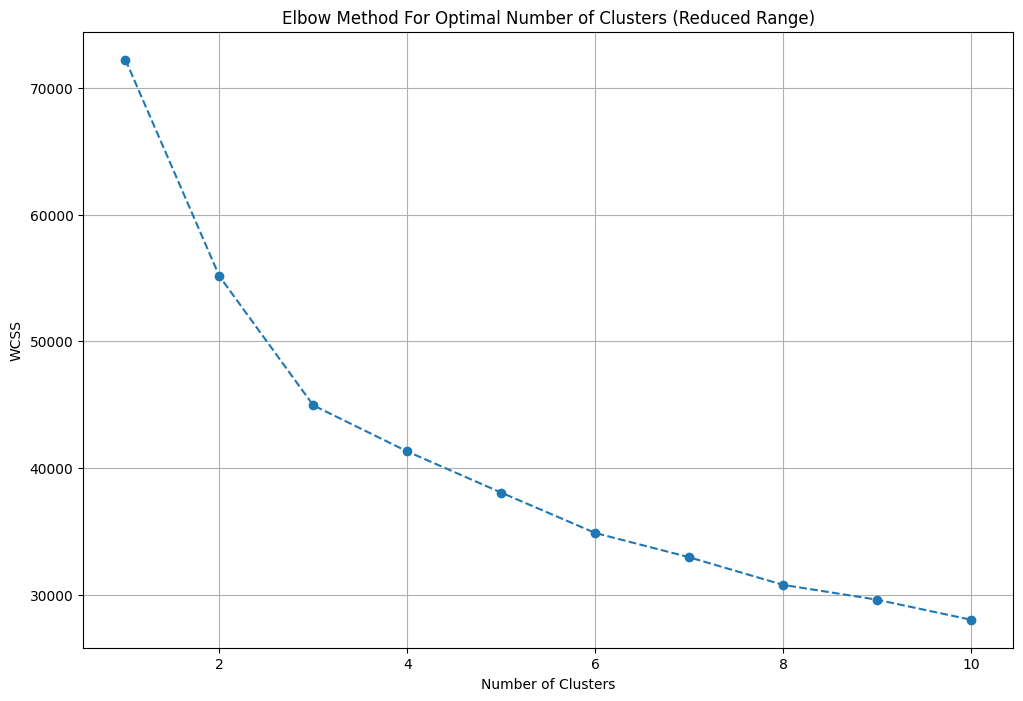

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df = df.iloc[:,:-18]

In [ ]:
df['furnishing_type'] = cluster_assignments

In [ ]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1722,Na,0
1682,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
2015,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '6 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
1614,"['1 Fan', '1 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1282,"['14 Wardrobe', '1 Water Purifier', '14 Fan', '1 Exhaust Fan', '6 Geyser', '24 Light', '6 AC', '1 Modular Kitchen', '3 Chimney', '9 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",1


In [ ]:
#features

In [ ]:
df[['society','features']].sample(5)

,society,features
456,signature global solera,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM']"
1962,ats triumph,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2862,ansal housing highland park,"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Water Storage', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
38,laxmi garden sector-11,"['Security / Fire Alarm', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting']"
3674,shapoorji pallonji joyville gurugram,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [ ]:
df['features'].isnull().sum()

634

In [ ]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'Wardrobe', 'furnishing_type'],
      dtype='object')

In [ ]:
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [ ]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [ ]:
temp_df = df[df['features'].isnull()]

In [ ]:
temp_df.shape

(634, 27)

In [ ]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [ ]:
df.loc[temp_df.index,'features'] = x.values

In [ ]:
df['features'].isnull().sum()

480

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [ ]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [ ]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_binary_df.shape

(3801, 130)

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

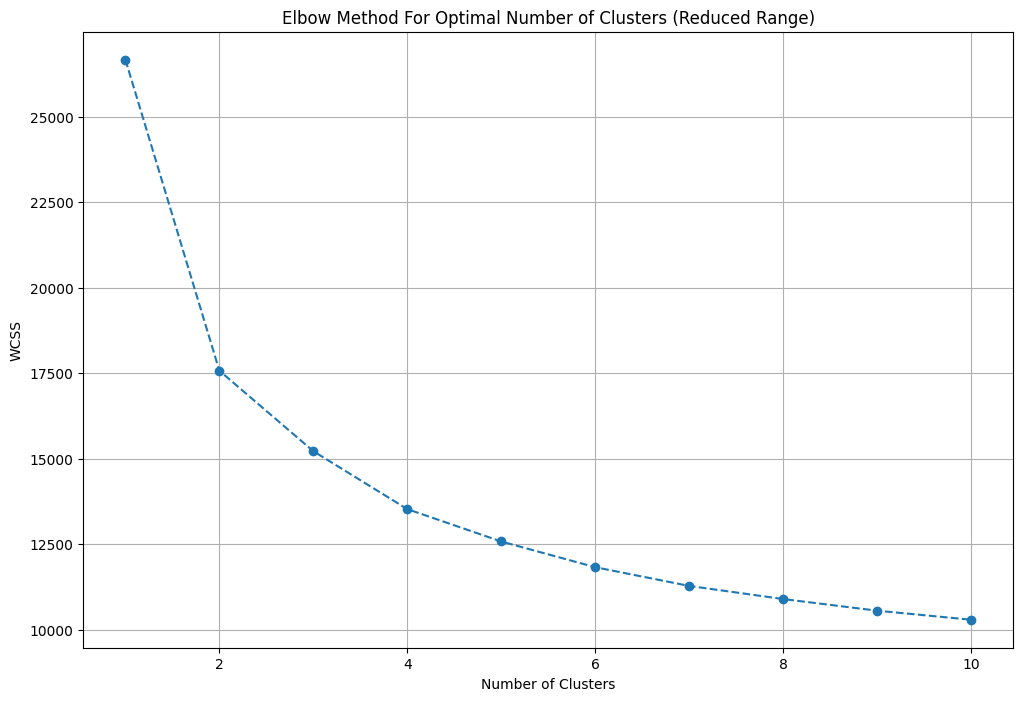

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [ ]:
df['luxury_score'] = luxury_score

In [ ]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [ ]:
df.drop(columns=['areaWithType'],inplace=True)

In [ ]:
df.shape

(3801, 23)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,2,2,2,1.0,Na,Moderately Old,780.0,NaN,NaN,0,0,0,0,0,0,0,0
1,house,independent,sector 39,1.80,21875.0,823.0,1,1,2,3.0,North-East,Relatively New,NaN,800.0,720.0,0,0,0,0,0,0,0,0
2,house,vipul tatvam villa,sector 48,7.35,22812.0,3222.0,4,5,2,2.0,South,Moderately Old,3222.0,NaN,NaN,1,1,1,1,0,4,1,144
3,flat,mapsko casa bella,sector 82,3.00,6134.0,4891.0,4,6,3+,25.0,West,Relatively New,4890.0,NaN,NaN,0,1,0,1,0,0,1,119
4,flat,ansal heights 86,sector 86,0.64,4706.0,1360.0,2,2,1,3.0,Na,New Property,NaN,1360.0,NaN,0,0,0,0,0,0,0,73


In [ ]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)